<a href="https://colab.research.google.com/github/data-better/RBOK/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
install.packages("keras")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(keras)

## 패션 MNIST

* 출처 : https://tensorflow.rstudio.com/tutorials/beginners/basic-ml/tutorial_basic_classification/

In [47]:
# 데이터 불러오기
fashion_mnist <- dataset_fashion_mnist()
c(train_images, train_labels) %<-% fashion_mnist$train
c(test_images, test_labels) %<-% fashion_mnist$test

In [48]:
class_names = c('T-shirt/top',
                'Trouser',
                'Pullover',
                'Dress',
                'Coat', 
                'Sandal',
                'Shirt',
                'Sneaker',
                'Bag',
                'Ankle boot')

In [49]:
train_images <- train_images / 255
test_images <- test_images / 255

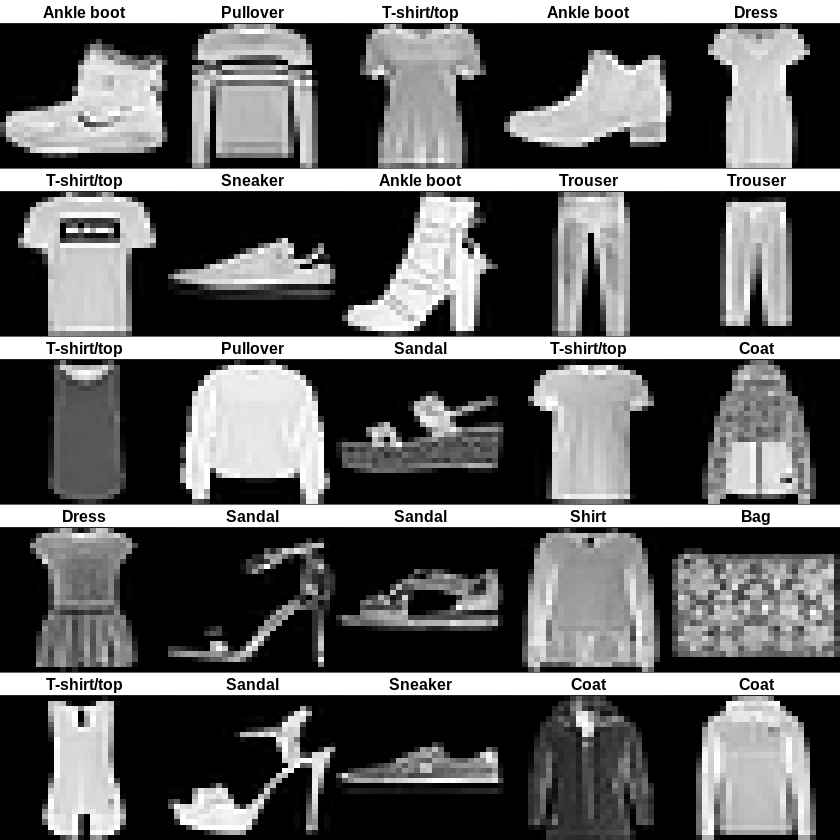

In [50]:
par(mfcol=c(5,5))
par(mar=c(0, 0, 1.5, 0), xaxs='i', yaxs='i')
for (i in 1:25) { 
  img <- train_images[i, , ]
  img <- t(apply(img, 2, rev)) 
  image(1:28, 1:28, img, col = gray((0:255)/255), xaxt = 'n', yaxt = 'n',
        main = paste(class_names[train_labels[i] + 1]))
}

#### (2) 모형 만들기

In [51]:
model <- keras_model_sequential()
model %>%
  layer_flatten(input_shape = c(28, 28)) %>%
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dense(units = 10, activation = 'softmax')

In [52]:
summary(model)

Model: "sequential_5"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
flatten_5 (Flatten)                 (None, 784)                     0           
________________________________________________________________________________
dense_14 (Dense)                    (None, 128)                     100480      
________________________________________________________________________________
dense_13 (Dense)                    (None, 10)                      1290        
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
________________________________________________________________________________


#### (3) 모형 컴파일

In [29]:
model %>% compile(
  optimizer = 'adam', 
  loss = 'sparse_categorical_crossentropy',
  metrics = c('accuracy')
)

#### (4) 모형 학습하기

In [30]:
model %>% fit(train_images, train_labels, epochs = 5, verbose = 2)

#### (5) 모형 평가하기

In [33]:
score <- model %>% evaluate(test_images, test_labels, verbose = 0)
score

loss  accuracy 
0.6986468 0.7784000

In [34]:
predictions <- model %>% predict(test_images)
po = which.max(predictions[1, ])
class_names[po] 

[1] "Ankle boot"

In [35]:
class_pred <- model %>% predict_classes(test_images)
class_pred[1:20]

[1] 9 2 1 1 6 1 4 6 5 7 2 5 8 3 2 1 2 2 8 0

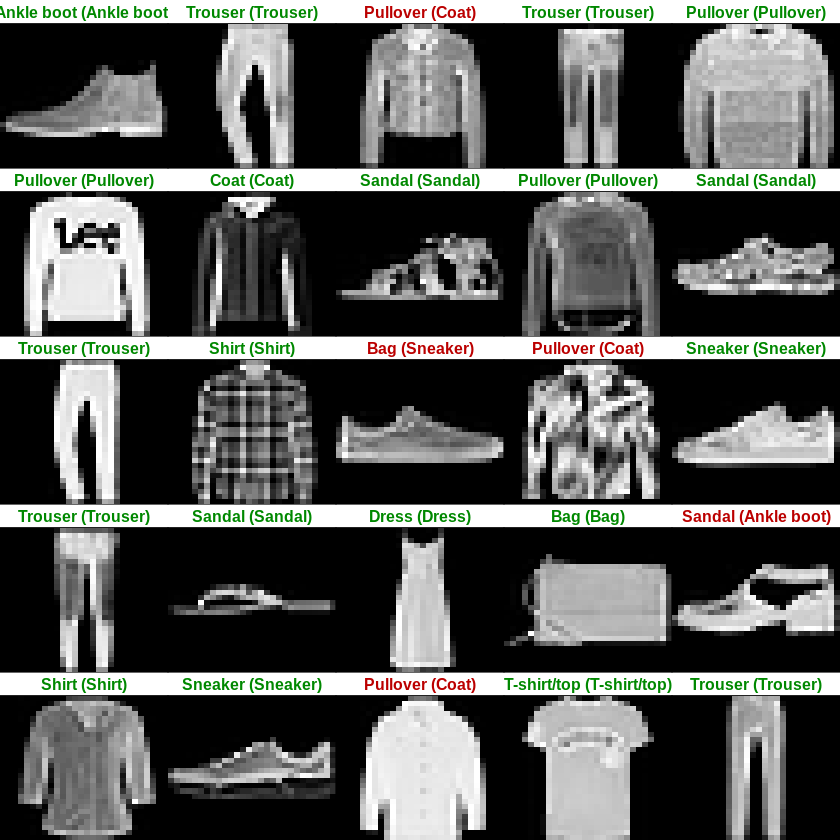

In [36]:
par(mfcol=c(5,5))
par(mar=c(0, 0, 1.5, 0), xaxs='i', yaxs='i')
for (i in 1:25) { 
  img <- test_images[i, , ]
  img <- t(apply(img, 2, rev)) 
  # subtract 1 as labels go from 0 to 9
  predicted_label <- which.max(predictions[i, ]) - 1
  true_label <- test_labels[i]
  if (predicted_label == true_label) {
    color <- '#008800' 
  } else {
    color <- '#bb0000'
  }
  image(1:28, 1:28, img, col = gray((0:255)/255), xaxt = 'n', yaxt = 'n',
        main = paste0(class_names[predicted_label + 1], " (",
                      class_names[true_label + 1], ")"),
        col.main = color)
}